# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv('./states_edu.csv')
pd.set_option('display.max_columns', None)
print(df.head())

       PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   SUPPORT_SERVICES_EXPENDITURE  OTHER_EXPEN

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [23]:
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)
df.rename({'GRADES_ALL_G':'ENROLL_ALL'}, axis=1, inplace=True)
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

Grade 4 Reading

How many years of data are logged in our dataset? 

In [8]:
years_count = df['YEAR'].nunique()
print(f"Number of years in the dataset where Grade 4 Reading is recorded: {years_count}")

Number of years in the dataset where Grade 4 Reading is recorded: 14


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [16]:
michigan_avg = df[df['STATE'] == 'MICHIGAN']['AVG_READING_4_SCORE'].mean()
ohio_avg = df[df['STATE'] == 'OHIO']['AVG_READING_4_SCORE'].mean()
print(f"Michigan average 4th grade reading score: {michigan_avg:.2f}")
print(f"Ohio average 4th grade reading score: {ohio_avg:.2f}")
print(f"{'Michigan' if michigan_avg > ohio_avg else 'Ohio'} has the higher average.")

Michigan average 4th grade reading score: 217.83
Ohio average 4th grade reading score: 223.18
Ohio has the higher average.


Find the average for your chosen test across all states in 2019

In [17]:
avg_2019 = df[df['YEAR'] == 2019]['AVG_READING_4_SCORE'].mean()
print(f"Average 4th grade reading score across all states in 2019: {avg_2019:.2f}")

Average 4th grade reading score across all states in 2019: 219.79


For each state, find a maximum value for your chosen test score

In [19]:
max_scores = df.groupby('STATE')['AVG_READING_4_SCORE'].max()
print(f"Maximum 4th grade reading scores for each state: {max_scores}")

Maximum 4th grade reading scores for each state: STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE  

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [24]:
df.dropna(subset=['INSTRUCTION_EXPENDITURE'], inplace=True)
df.dropna(subset=['SUPPORT_SERVICES_EXPENDITURE'], inplace=True)

#Created feature to find expenditure per student for two types of expenditure
#Strength of correlation may point to what expenditure is most effective for student performance
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']

df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

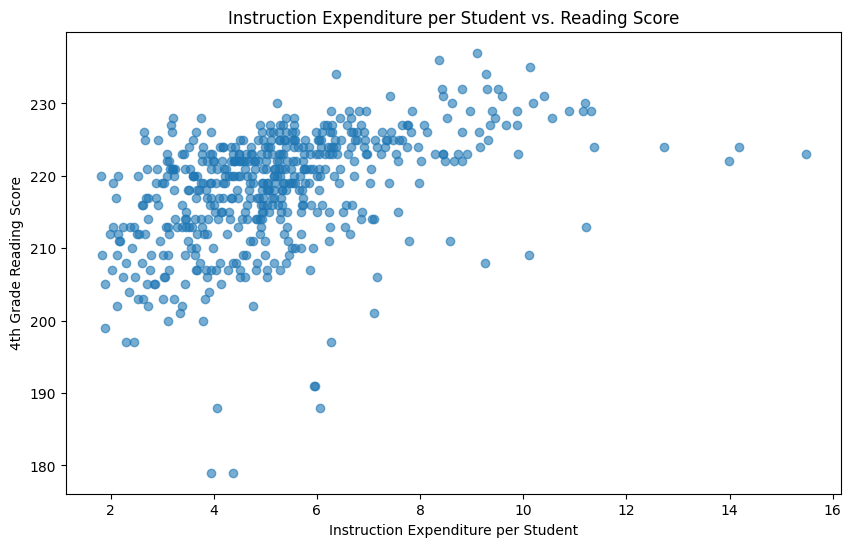

Instruction Expenditure per Student correlation with 4th Grade Reading Score: 0.4608


In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(df['INSTRUCTION_EXPENDITURE_PER_STUDENT'], df['AVG_READING_4_SCORE'], alpha=0.6)
plt.xlabel('Instruction Expenditure per Student')
plt.ylabel('4th Grade Reading Score')
plt.title('Instruction Expenditure per Student vs. Reading Score')
plt.show()

correlations = df['INSTRUCTION_EXPENDITURE_PER_STUDENT'].corr(df['AVG_READING_4_SCORE'])
print(f"Instruction Expenditure per Student correlation with 4th Grade Reading Score: {correlations:.4f}")

**Visualization 2**

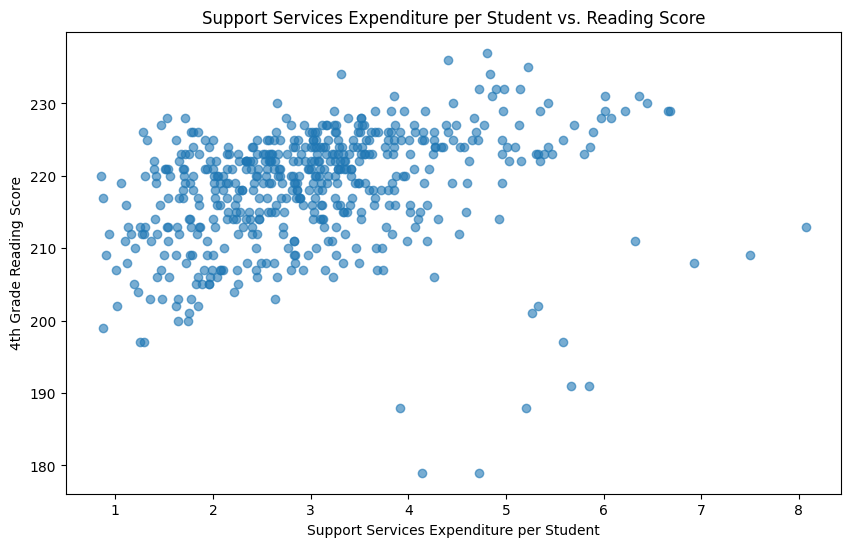

Support Services Expenditure per Student correlation with 4th Grade Reading Score: 0.2853


In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'], df['AVG_READING_4_SCORE'], alpha=0.6)
plt.xlabel('Support Services Expenditure per Student')
plt.ylabel('4th Grade Reading Score')
plt.title('Support Services Expenditure per Student vs. Reading Score')
plt.show()

correlations = df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'].corr(df['AVG_READING_4_SCORE'])
print(f"Support Services Expenditure per Student correlation with 4th Grade Reading Score: {correlations:.4f}")

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = df[['INSTRUCTION_EXPENDITURE_PER_STUDENT','SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']
y.fillna(y.median(), inplace=True)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
model = LinearRegression()

In [51]:
model.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [58]:
print(model.intercept_)
print(model.coef_)

print(model.score(X_test, y_test))
print(np.mean(np.abs(model.predict(X_test)-y_test)))

211.0783682664847
[ 3.32499829 -3.35008431]
0.3836234557042135
5.347342850024169


Interestingly, the support service expenditure variable has a negative coefficient.

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

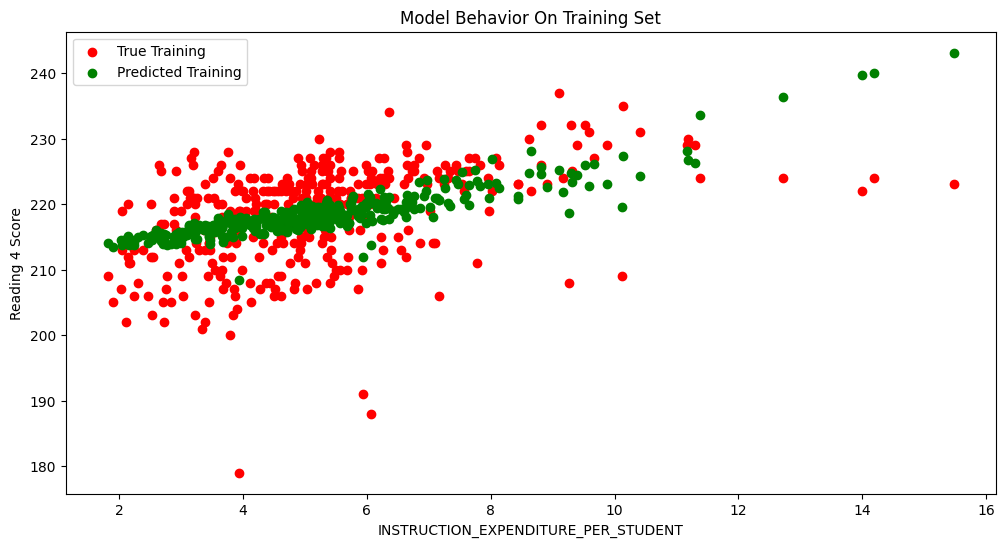

In [59]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

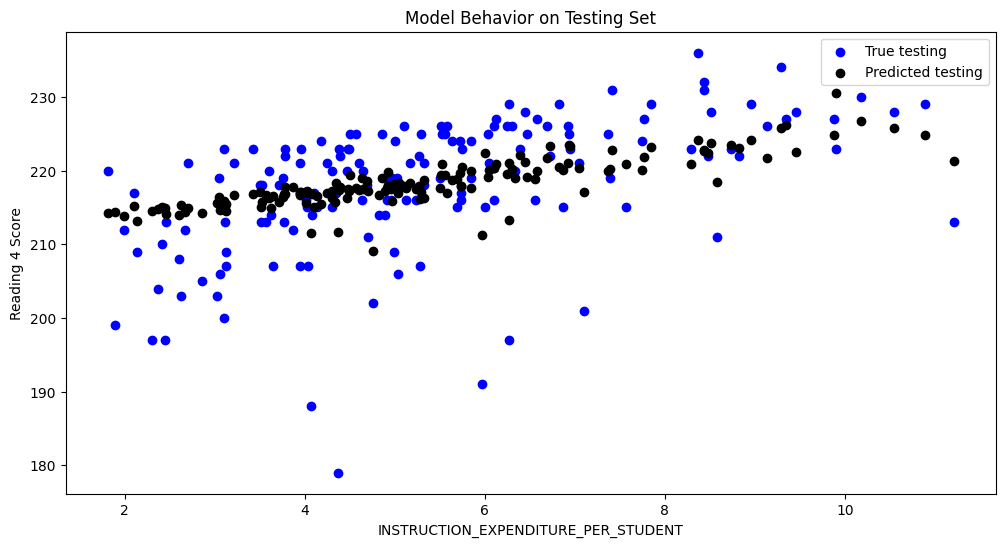

In [60]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 Score')
plt.title("Model Behavior on Testing Set")